***
    
Demo EvoJAX for PINN (Physics-Informed Neural Network)
    
***

    Version: 2023-03-16
    
    Author : Nicholas Sung Wei Yong, Wong Jian Cheng, Ooi Chin Chun, Abhishek Gupta

    Contain:
    
    1. PINN for solving projectile motion equation
    
    2. Optimize PINN using CMA-ES solver in the EvoJAX framework
       -  as described in Nicholas Sung Wei Yong, Jian Cheng Wong, Pao-Hsiung Chiu, Abhishek Gupta, Chinchun Ooi, Yew-Soon Ong
       "Neuroevolution Surpasses Stochastic Gradient Descent for Physics-Informed Neural Networks" arXiv preprint arXiv:2212.07624 (2022).

# Demo

In [1]:
# choose GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# import library
import numpy as np
import time

# import problem
from projectile import get_fitness, policy # Number of parameters: 240

CMA Solver

In [2]:
from evojax.algo import CMA_ES_JAX

seed = 0
solver = CMA_ES_JAX(
         pop_size=80, init_stdev=0.001,
         param_size=policy.num_params, seed=seed)

Training

In [3]:
max_iters = 100000
num_tests = 1

loss_ls = []
t_training = []

runtime = 0
train_iters = 0
while (train_iters < max_iters) and (runtime < 60):
    start = time.time()
    # Training.
    params = solver.ask()
    scores = get_fitness(params)
    # Updates the weights through the solver
    solver.tell(fitness=scores)
    # This is the average loss of all the population of parameters
    score_avg_loss = np.mean(np.array(scores, copy=False, subok=True))
    best_params = solver.best_params
    end = time.time()
    t_training.append(end-start)
    loss_ls.append(-1*score_avg_loss)
    # update
    runtime += (end-start)
    train_iters += 1
    # print out
    print ('time = %.2fs  loss = %.2e'%(runtime, loss_ls[-1]))

time = 2.85s  loss = 1.18e+02
time = 3.67s  loss = 1.18e+02
time = 3.67s  loss = 1.18e+02
time = 3.68s  loss = 1.18e+02
time = 3.69s  loss = 1.18e+02
time = 3.70s  loss = 1.18e+02
time = 3.71s  loss = 1.18e+02
time = 3.71s  loss = 1.18e+02
time = 3.72s  loss = 1.18e+02
time = 3.73s  loss = 1.18e+02
time = 3.74s  loss = 1.18e+02
time = 3.75s  loss = 1.18e+02
time = 3.75s  loss = 1.18e+02
time = 3.76s  loss = 1.18e+02
time = 3.77s  loss = 1.18e+02
time = 3.78s  loss = 1.18e+02
time = 3.79s  loss = 1.18e+02
time = 3.80s  loss = 1.18e+02
time = 3.81s  loss = 1.18e+02
time = 3.82s  loss = 1.18e+02
time = 3.83s  loss = 1.18e+02
time = 3.84s  loss = 1.18e+02
time = 3.84s  loss = 1.18e+02
time = 3.85s  loss = 1.18e+02
time = 3.86s  loss = 1.18e+02
time = 3.87s  loss = 1.18e+02
time = 3.88s  loss = 1.18e+02
time = 3.89s  loss = 1.18e+02
time = 3.89s  loss = 1.18e+02
time = 3.90s  loss = 1.18e+02
time = 3.91s  loss = 1.18e+02
time = 3.92s  loss = 1.18e+02
time = 3.93s  loss = 1.18e+02
time = 3.9

time = 5.91s  loss = 3.95e+01
time = 5.92s  loss = 2.98e+01
time = 5.93s  loss = 3.10e+01
time = 5.94s  loss = 3.89e+01
time = 5.94s  loss = 3.05e+01
time = 5.95s  loss = 3.14e+01
time = 5.96s  loss = 2.94e+01
time = 5.97s  loss = 3.02e+01
time = 5.97s  loss = 2.74e+01
time = 5.98s  loss = 2.93e+01
time = 5.99s  loss = 2.95e+01
time = 6.00s  loss = 2.78e+01
time = 6.00s  loss = 3.33e+01
time = 6.01s  loss = 3.19e+01
time = 6.02s  loss = 2.85e+01
time = 6.03s  loss = 3.30e+01
time = 6.03s  loss = 2.95e+01
time = 6.04s  loss = 2.92e+01
time = 6.05s  loss = 2.75e+01
time = 6.06s  loss = 2.82e+01
time = 6.06s  loss = 2.48e+01
time = 6.07s  loss = 2.48e+01
time = 6.08s  loss = 2.78e+01
time = 6.08s  loss = 2.88e+01
time = 6.09s  loss = 2.62e+01
time = 6.10s  loss = 2.72e+01
time = 6.11s  loss = 2.88e+01
time = 6.11s  loss = 2.61e+01
time = 6.12s  loss = 2.64e+01
time = 6.13s  loss = 2.43e+01
time = 6.14s  loss = 3.52e+01
time = 6.14s  loss = 2.63e+01
time = 6.15s  loss = 2.72e+01
time = 6.1

time = 7.96s  loss = 1.62e+01
time = 7.96s  loss = 1.55e+01
time = 7.97s  loss = 1.59e+01
time = 7.98s  loss = 1.65e+01
time = 7.98s  loss = 1.60e+01
time = 7.99s  loss = 1.58e+01
time = 8.00s  loss = 1.50e+01
time = 8.01s  loss = 1.59e+01
time = 8.01s  loss = 1.42e+01
time = 8.02s  loss = 1.60e+01
time = 8.03s  loss = 1.82e+01
time = 8.04s  loss = 1.46e+01
time = 8.04s  loss = 1.39e+01
time = 8.05s  loss = 1.59e+01
time = 8.06s  loss = 1.49e+01
time = 8.07s  loss = 1.51e+01
time = 8.07s  loss = 1.58e+01
time = 8.08s  loss = 1.48e+01
time = 8.09s  loss = 1.63e+01
time = 8.10s  loss = 1.59e+01
time = 8.11s  loss = 1.95e+01
time = 8.11s  loss = 1.61e+01
time = 8.12s  loss = 1.48e+01
time = 8.13s  loss = 1.53e+01
time = 8.14s  loss = 1.55e+01
time = 8.15s  loss = 1.48e+01
time = 8.15s  loss = 1.51e+01
time = 8.16s  loss = 1.63e+01
time = 8.17s  loss = 1.71e+01
time = 8.18s  loss = 1.67e+01
time = 8.19s  loss = 1.63e+01
time = 8.19s  loss = 1.77e+01
time = 8.20s  loss = 1.67e+01
time = 8.2

time = 10.01s  loss = 7.46e+00
time = 10.02s  loss = 8.83e+00
time = 10.03s  loss = 7.55e+00
time = 10.04s  loss = 7.91e+00
time = 10.04s  loss = 8.93e+00
time = 10.05s  loss = 7.94e+00
time = 10.06s  loss = 7.66e+00
time = 10.07s  loss = 8.15e+00
time = 10.07s  loss = 8.20e+00
time = 10.08s  loss = 8.00e+00
time = 10.09s  loss = 7.32e+00
time = 10.10s  loss = 8.13e+00
time = 10.10s  loss = 7.64e+00
time = 10.11s  loss = 7.72e+00
time = 10.12s  loss = 8.12e+00
time = 10.12s  loss = 8.07e+00
time = 10.13s  loss = 7.90e+00
time = 10.14s  loss = 7.41e+00
time = 10.15s  loss = 7.96e+00
time = 10.15s  loss = 7.88e+00
time = 10.16s  loss = 7.52e+00
time = 10.17s  loss = 7.85e+00
time = 10.18s  loss = 8.14e+00
time = 10.18s  loss = 7.90e+00
time = 10.19s  loss = 8.06e+00
time = 10.20s  loss = 7.98e+00
time = 10.21s  loss = 6.78e+00
time = 10.21s  loss = 7.79e+00
time = 10.22s  loss = 7.17e+00
time = 10.23s  loss = 6.99e+00
time = 10.24s  loss = 7.82e+00
time = 10.25s  loss = 9.05e+00
time = 1

time = 12.06s  loss = 4.18e+00
time = 12.06s  loss = 4.47e+00
time = 12.07s  loss = 4.16e+00
time = 12.08s  loss = 4.32e+00
time = 12.09s  loss = 4.44e+00
time = 12.09s  loss = 4.47e+00
time = 12.10s  loss = 4.75e+00
time = 12.11s  loss = 4.41e+00
time = 12.12s  loss = 4.12e+00
time = 12.12s  loss = 4.43e+00
time = 12.13s  loss = 4.34e+00
time = 12.14s  loss = 4.59e+00
time = 12.15s  loss = 5.24e+00
time = 12.15s  loss = 4.67e+00
time = 12.16s  loss = 4.95e+00
time = 12.17s  loss = 4.65e+00
time = 12.18s  loss = 4.90e+00
time = 12.18s  loss = 4.03e+00
time = 12.19s  loss = 4.53e+00
time = 12.20s  loss = 5.11e+00
time = 12.20s  loss = 4.67e+00
time = 12.21s  loss = 4.90e+00
time = 12.22s  loss = 4.62e+00
time = 12.23s  loss = 4.65e+00
time = 12.23s  loss = 4.68e+00
time = 12.24s  loss = 4.57e+00
time = 12.25s  loss = 4.59e+00
time = 12.26s  loss = 5.10e+00
time = 12.26s  loss = 4.88e+00
time = 12.27s  loss = 5.00e+00
time = 12.28s  loss = 4.79e+00
time = 12.29s  loss = 4.69e+00
time = 1

time = 14.11s  loss = 3.10e+00
time = 14.12s  loss = 2.80e+00
time = 14.12s  loss = 3.09e+00
time = 14.13s  loss = 2.81e+00
time = 14.14s  loss = 3.13e+00
time = 14.15s  loss = 2.80e+00
time = 14.16s  loss = 2.60e+00
time = 14.16s  loss = 3.33e+00
time = 14.17s  loss = 3.01e+00
time = 14.18s  loss = 3.17e+00
time = 14.19s  loss = 3.19e+00
time = 14.19s  loss = 2.94e+00
time = 14.20s  loss = 2.56e+00
time = 14.21s  loss = 3.42e+00
time = 14.22s  loss = 2.79e+00
time = 14.22s  loss = 2.66e+00
time = 14.23s  loss = 4.04e+00
time = 14.24s  loss = 3.59e+00
time = 14.25s  loss = 2.55e+00
time = 14.25s  loss = 2.85e+00
time = 14.26s  loss = 3.00e+00
time = 14.27s  loss = 2.71e+00
time = 14.28s  loss = 2.94e+00
time = 14.28s  loss = 3.04e+00
time = 14.29s  loss = 3.19e+00
time = 14.30s  loss = 3.05e+00
time = 14.31s  loss = 2.56e+00
time = 14.31s  loss = 2.85e+00
time = 14.32s  loss = 2.77e+00
time = 14.33s  loss = 3.50e+00
time = 14.34s  loss = 2.91e+00
time = 14.34s  loss = 3.00e+00
time = 1

time = 16.16s  loss = 1.31e+00
time = 16.17s  loss = 1.18e+00
time = 16.18s  loss = 1.38e+00
time = 16.18s  loss = 1.40e+00
time = 16.19s  loss = 1.66e+00
time = 16.20s  loss = 1.19e+00
time = 16.21s  loss = 1.24e+00
time = 16.21s  loss = 1.45e+00
time = 16.22s  loss = 1.91e+00
time = 16.23s  loss = 1.75e+00
time = 16.24s  loss = 1.28e+00
time = 16.24s  loss = 1.57e+00
time = 16.25s  loss = 1.33e+00
time = 16.26s  loss = 1.48e+00
time = 16.27s  loss = 1.61e+00
time = 16.27s  loss = 1.60e+00
time = 16.28s  loss = 1.46e+00
time = 16.29s  loss = 1.33e+00
time = 16.29s  loss = 1.67e+00
time = 16.30s  loss = 1.34e+00
time = 16.31s  loss = 1.36e+00
time = 16.32s  loss = 1.68e+00
time = 16.32s  loss = 1.34e+00
time = 16.33s  loss = 1.22e+00
time = 16.34s  loss = 1.39e+00
time = 16.35s  loss = 1.35e+00
time = 16.35s  loss = 1.45e+00
time = 16.36s  loss = 1.41e+00
time = 16.37s  loss = 1.37e+00
time = 16.38s  loss = 1.21e+00
time = 16.38s  loss = 1.24e+00
time = 16.39s  loss = 1.26e+00
time = 1

time = 18.21s  loss = 9.27e-01
time = 18.21s  loss = 9.26e-01
time = 18.22s  loss = 9.17e-01
time = 18.23s  loss = 1.02e+00
time = 18.24s  loss = 1.02e+00
time = 18.24s  loss = 1.01e+00
time = 18.25s  loss = 8.99e-01
time = 18.26s  loss = 9.35e-01
time = 18.26s  loss = 9.71e-01
time = 18.27s  loss = 1.08e+00
time = 18.28s  loss = 1.01e+00
time = 18.29s  loss = 1.03e+00
time = 18.29s  loss = 9.95e-01
time = 18.30s  loss = 9.80e-01
time = 18.31s  loss = 1.16e+00
time = 18.32s  loss = 1.09e+00
time = 18.32s  loss = 1.01e+00
time = 18.33s  loss = 8.44e-01
time = 18.34s  loss = 9.68e-01
time = 18.35s  loss = 1.04e+00
time = 18.35s  loss = 9.92e-01
time = 18.36s  loss = 8.69e-01
time = 18.37s  loss = 9.21e-01
time = 18.37s  loss = 1.04e+00
time = 18.38s  loss = 8.60e-01
time = 18.39s  loss = 9.79e-01
time = 18.40s  loss = 1.04e+00
time = 18.40s  loss = 9.49e-01
time = 18.41s  loss = 1.02e+00
time = 18.42s  loss = 9.71e-01
time = 18.43s  loss = 9.48e-01
time = 18.43s  loss = 8.60e-01
time = 1

time = 20.24s  loss = 6.37e-01
time = 20.25s  loss = 6.41e-01
time = 20.25s  loss = 6.17e-01
time = 20.26s  loss = 6.60e-01
time = 20.27s  loss = 7.01e-01
time = 20.27s  loss = 6.14e-01
time = 20.28s  loss = 6.35e-01
time = 20.29s  loss = 6.49e-01
time = 20.30s  loss = 6.23e-01
time = 20.30s  loss = 6.06e-01
time = 20.31s  loss = 5.84e-01
time = 20.32s  loss = 5.92e-01
time = 20.33s  loss = 6.41e-01
time = 20.33s  loss = 5.97e-01
time = 20.34s  loss = 6.51e-01
time = 20.35s  loss = 6.69e-01
time = 20.36s  loss = 6.36e-01
time = 20.36s  loss = 6.22e-01
time = 20.37s  loss = 6.56e-01
time = 20.38s  loss = 5.78e-01
time = 20.38s  loss = 6.64e-01
time = 20.39s  loss = 6.31e-01
time = 20.40s  loss = 6.12e-01
time = 20.41s  loss = 7.00e-01
time = 20.41s  loss = 6.44e-01
time = 20.42s  loss = 6.17e-01
time = 20.43s  loss = 6.05e-01
time = 20.44s  loss = 6.06e-01
time = 20.44s  loss = 6.59e-01
time = 20.45s  loss = 6.80e-01
time = 20.46s  loss = 6.61e-01
time = 20.47s  loss = 7.06e-01
time = 2

time = 22.29s  loss = 4.00e-01
time = 22.29s  loss = 3.93e-01
time = 22.30s  loss = 3.98e-01
time = 22.31s  loss = 4.20e-01
time = 22.32s  loss = 3.99e-01
time = 22.32s  loss = 4.23e-01
time = 22.33s  loss = 4.13e-01
time = 22.34s  loss = 4.20e-01
time = 22.35s  loss = 4.14e-01
time = 22.35s  loss = 3.97e-01
time = 22.36s  loss = 4.00e-01
time = 22.37s  loss = 4.27e-01
time = 22.38s  loss = 3.96e-01
time = 22.38s  loss = 4.09e-01
time = 22.39s  loss = 3.87e-01
time = 22.40s  loss = 3.98e-01
time = 22.40s  loss = 3.97e-01
time = 22.41s  loss = 4.03e-01
time = 22.42s  loss = 3.88e-01
time = 22.43s  loss = 3.98e-01
time = 22.43s  loss = 4.03e-01
time = 22.44s  loss = 3.87e-01
time = 22.45s  loss = 3.90e-01
time = 22.46s  loss = 3.94e-01
time = 22.46s  loss = 4.12e-01
time = 22.47s  loss = 3.87e-01
time = 22.48s  loss = 3.96e-01
time = 22.49s  loss = 3.95e-01
time = 22.49s  loss = 3.97e-01
time = 22.50s  loss = 3.92e-01
time = 22.51s  loss = 3.81e-01
time = 22.52s  loss = 3.77e-01
time = 2

time = 24.35s  loss = 3.14e-01
time = 24.36s  loss = 3.27e-01
time = 24.36s  loss = 3.18e-01
time = 24.37s  loss = 3.26e-01
time = 24.38s  loss = 3.25e-01
time = 24.39s  loss = 3.25e-01
time = 24.39s  loss = 3.15e-01
time = 24.40s  loss = 3.19e-01
time = 24.41s  loss = 3.27e-01
time = 24.42s  loss = 3.35e-01
time = 24.42s  loss = 3.40e-01
time = 24.43s  loss = 3.15e-01
time = 24.44s  loss = 3.10e-01
time = 24.44s  loss = 3.32e-01
time = 24.45s  loss = 3.38e-01
time = 24.46s  loss = 3.18e-01
time = 24.47s  loss = 3.30e-01
time = 24.47s  loss = 3.36e-01
time = 24.48s  loss = 3.05e-01
time = 24.49s  loss = 3.41e-01
time = 24.50s  loss = 3.14e-01
time = 24.50s  loss = 3.16e-01
time = 24.51s  loss = 3.14e-01
time = 24.52s  loss = 3.15e-01
time = 24.53s  loss = 3.23e-01
time = 24.53s  loss = 3.20e-01
time = 24.54s  loss = 3.21e-01
time = 24.55s  loss = 3.32e-01
time = 24.56s  loss = 3.29e-01
time = 24.56s  loss = 3.22e-01
time = 24.57s  loss = 3.24e-01
time = 24.58s  loss = 3.23e-01
time = 2

time = 26.39s  loss = 2.58e-01
time = 26.39s  loss = 2.37e-01
time = 26.40s  loss = 2.45e-01
time = 26.41s  loss = 2.43e-01
time = 26.42s  loss = 2.49e-01
time = 26.42s  loss = 2.49e-01
time = 26.43s  loss = 2.54e-01
time = 26.44s  loss = 2.47e-01
time = 26.45s  loss = 2.44e-01
time = 26.45s  loss = 2.44e-01
time = 26.46s  loss = 2.44e-01
time = 26.47s  loss = 2.42e-01
time = 26.48s  loss = 2.43e-01
time = 26.48s  loss = 2.51e-01
time = 26.49s  loss = 2.43e-01
time = 26.50s  loss = 2.38e-01
time = 26.51s  loss = 2.39e-01
time = 26.51s  loss = 2.36e-01
time = 26.52s  loss = 2.51e-01
time = 26.53s  loss = 2.36e-01
time = 26.53s  loss = 2.36e-01
time = 26.54s  loss = 2.44e-01
time = 26.55s  loss = 2.50e-01
time = 26.56s  loss = 2.38e-01
time = 26.56s  loss = 2.36e-01
time = 26.57s  loss = 2.37e-01
time = 26.58s  loss = 2.32e-01
time = 26.59s  loss = 2.37e-01
time = 26.59s  loss = 2.36e-01
time = 26.60s  loss = 2.36e-01
time = 26.61s  loss = 2.36e-01
time = 26.62s  loss = 2.49e-01
time = 2

time = 28.44s  loss = 1.71e-01
time = 28.45s  loss = 1.68e-01
time = 28.46s  loss = 1.66e-01
time = 28.46s  loss = 1.65e-01
time = 28.47s  loss = 1.64e-01
time = 28.48s  loss = 1.66e-01
time = 28.49s  loss = 1.65e-01
time = 28.50s  loss = 1.61e-01
time = 28.50s  loss = 1.63e-01
time = 28.51s  loss = 1.64e-01
time = 28.52s  loss = 1.65e-01
time = 28.53s  loss = 1.65e-01
time = 28.53s  loss = 1.64e-01
time = 28.54s  loss = 1.61e-01
time = 28.55s  loss = 1.64e-01
time = 28.56s  loss = 1.63e-01
time = 28.56s  loss = 1.63e-01
time = 28.57s  loss = 1.61e-01
time = 28.58s  loss = 1.60e-01
time = 28.59s  loss = 1.58e-01
time = 28.59s  loss = 1.64e-01
time = 28.60s  loss = 1.60e-01
time = 28.61s  loss = 1.56e-01
time = 28.62s  loss = 1.61e-01
time = 28.62s  loss = 1.55e-01
time = 28.63s  loss = 1.56e-01
time = 28.64s  loss = 1.55e-01
time = 28.64s  loss = 1.58e-01
time = 28.65s  loss = 1.56e-01
time = 28.66s  loss = 1.56e-01
time = 28.67s  loss = 1.51e-01
time = 28.67s  loss = 1.51e-01
time = 2

time = 30.49s  loss = 1.13e-01
time = 30.50s  loss = 1.14e-01
time = 30.51s  loss = 1.15e-01
time = 30.51s  loss = 1.13e-01
time = 30.52s  loss = 1.15e-01
time = 30.53s  loss = 1.14e-01
time = 30.54s  loss = 1.17e-01
time = 30.54s  loss = 1.13e-01
time = 30.55s  loss = 1.13e-01
time = 30.56s  loss = 1.15e-01
time = 30.57s  loss = 1.15e-01
time = 30.57s  loss = 1.17e-01
time = 30.58s  loss = 1.10e-01
time = 30.59s  loss = 1.15e-01
time = 30.60s  loss = 1.17e-01
time = 30.60s  loss = 1.15e-01
time = 30.61s  loss = 1.13e-01
time = 30.62s  loss = 1.14e-01
time = 30.63s  loss = 1.16e-01
time = 30.63s  loss = 1.14e-01
time = 30.64s  loss = 1.15e-01
time = 30.65s  loss = 1.14e-01
time = 30.65s  loss = 1.11e-01
time = 30.66s  loss = 1.10e-01
time = 30.67s  loss = 1.12e-01
time = 30.68s  loss = 1.12e-01
time = 30.68s  loss = 1.11e-01
time = 30.69s  loss = 1.11e-01
time = 30.70s  loss = 1.15e-01
time = 30.71s  loss = 1.09e-01
time = 30.72s  loss = 1.11e-01
time = 30.72s  loss = 1.12e-01
time = 3

time = 32.55s  loss = 9.26e-02
time = 32.56s  loss = 8.78e-02
time = 32.57s  loss = 8.52e-02
time = 32.57s  loss = 8.80e-02
time = 32.58s  loss = 8.57e-02
time = 32.59s  loss = 8.23e-02
time = 32.60s  loss = 8.68e-02
time = 32.60s  loss = 8.64e-02
time = 32.61s  loss = 8.36e-02
time = 32.62s  loss = 8.44e-02
time = 32.62s  loss = 8.66e-02
time = 32.63s  loss = 8.48e-02
time = 32.64s  loss = 8.46e-02
time = 32.65s  loss = 8.29e-02
time = 32.65s  loss = 8.20e-02
time = 32.66s  loss = 8.05e-02
time = 32.67s  loss = 8.57e-02
time = 32.68s  loss = 8.27e-02
time = 32.68s  loss = 8.46e-02
time = 32.69s  loss = 8.03e-02
time = 32.70s  loss = 8.37e-02
time = 32.71s  loss = 8.44e-02
time = 32.71s  loss = 8.07e-02
time = 32.72s  loss = 8.28e-02
time = 32.73s  loss = 8.10e-02
time = 32.73s  loss = 8.64e-02
time = 32.74s  loss = 8.46e-02
time = 32.75s  loss = 8.59e-02
time = 32.76s  loss = 8.42e-02
time = 32.76s  loss = 8.22e-02
time = 32.77s  loss = 8.42e-02
time = 32.78s  loss = 7.92e-02
time = 3

time = 34.61s  loss = 5.50e-02
time = 34.61s  loss = 5.36e-02
time = 34.62s  loss = 5.47e-02
time = 34.63s  loss = 5.49e-02
time = 34.64s  loss = 5.67e-02
time = 34.64s  loss = 5.36e-02
time = 34.65s  loss = 5.59e-02
time = 34.66s  loss = 5.31e-02
time = 34.67s  loss = 5.30e-02
time = 34.67s  loss = 5.56e-02
time = 34.68s  loss = 5.39e-02
time = 34.69s  loss = 5.38e-02
time = 34.69s  loss = 5.37e-02
time = 34.70s  loss = 5.23e-02
time = 34.71s  loss = 5.11e-02
time = 34.72s  loss = 5.27e-02
time = 34.72s  loss = 5.40e-02
time = 34.73s  loss = 5.45e-02
time = 34.74s  loss = 5.31e-02
time = 34.75s  loss = 5.29e-02
time = 34.76s  loss = 4.98e-02
time = 34.77s  loss = 4.99e-02
time = 34.77s  loss = 5.35e-02
time = 34.78s  loss = 5.18e-02
time = 34.79s  loss = 5.15e-02
time = 34.79s  loss = 5.26e-02
time = 34.80s  loss = 5.17e-02
time = 34.81s  loss = 5.24e-02
time = 34.82s  loss = 5.10e-02
time = 34.82s  loss = 4.96e-02
time = 34.83s  loss = 4.82e-02
time = 34.84s  loss = 4.97e-02
time = 3

time = 36.65s  loss = 3.16e-02
time = 36.65s  loss = 3.26e-02
time = 36.66s  loss = 3.12e-02
time = 36.67s  loss = 3.12e-02
time = 36.68s  loss = 3.13e-02
time = 36.69s  loss = 3.06e-02
time = 36.70s  loss = 3.18e-02
time = 36.70s  loss = 3.04e-02
time = 36.71s  loss = 3.03e-02
time = 36.72s  loss = 3.10e-02
time = 36.72s  loss = 3.36e-02
time = 36.73s  loss = 3.14e-02
time = 36.74s  loss = 3.03e-02
time = 36.75s  loss = 3.03e-02
time = 36.75s  loss = 3.00e-02
time = 36.76s  loss = 3.06e-02
time = 36.77s  loss = 2.89e-02
time = 36.78s  loss = 2.99e-02
time = 36.78s  loss = 3.00e-02
time = 36.79s  loss = 2.98e-02
time = 36.80s  loss = 3.04e-02
time = 36.81s  loss = 2.91e-02
time = 36.81s  loss = 3.03e-02
time = 36.82s  loss = 3.11e-02
time = 36.83s  loss = 2.83e-02
time = 36.83s  loss = 2.96e-02
time = 36.84s  loss = 3.03e-02
time = 36.85s  loss = 3.12e-02
time = 36.86s  loss = 2.99e-02
time = 36.86s  loss = 3.04e-02
time = 36.87s  loss = 2.89e-02
time = 36.88s  loss = 2.95e-02
time = 3

time = 38.69s  loss = 1.65e-02
time = 38.70s  loss = 1.67e-02
time = 38.71s  loss = 1.60e-02
time = 38.71s  loss = 1.64e-02
time = 38.72s  loss = 1.62e-02
time = 38.73s  loss = 1.53e-02
time = 38.74s  loss = 1.60e-02
time = 38.74s  loss = 1.59e-02
time = 38.75s  loss = 1.65e-02
time = 38.76s  loss = 1.53e-02
time = 38.76s  loss = 1.58e-02
time = 38.77s  loss = 1.57e-02
time = 38.78s  loss = 1.52e-02
time = 38.79s  loss = 1.59e-02
time = 38.79s  loss = 1.63e-02
time = 38.80s  loss = 1.58e-02
time = 38.81s  loss = 1.60e-02
time = 38.82s  loss = 1.51e-02
time = 38.82s  loss = 1.59e-02
time = 38.83s  loss = 1.63e-02
time = 38.84s  loss = 1.53e-02
time = 38.85s  loss = 1.51e-02
time = 38.85s  loss = 1.56e-02
time = 38.86s  loss = 1.50e-02
time = 38.87s  loss = 1.59e-02
time = 38.88s  loss = 1.47e-02
time = 38.88s  loss = 1.52e-02
time = 38.89s  loss = 1.49e-02
time = 38.90s  loss = 1.42e-02
time = 38.91s  loss = 1.50e-02
time = 38.91s  loss = 1.51e-02
time = 38.92s  loss = 1.56e-02
time = 3

time = 40.71s  loss = 8.77e-03
time = 40.72s  loss = 9.00e-03
time = 40.73s  loss = 8.99e-03
time = 40.74s  loss = 9.23e-03
time = 40.74s  loss = 8.78e-03
time = 40.75s  loss = 9.33e-03
time = 40.76s  loss = 9.27e-03
time = 40.77s  loss = 9.17e-03
time = 40.77s  loss = 9.32e-03
time = 40.78s  loss = 9.01e-03
time = 40.79s  loss = 9.35e-03
time = 40.80s  loss = 9.77e-03
time = 40.80s  loss = 9.37e-03
time = 40.81s  loss = 9.06e-03
time = 40.82s  loss = 9.71e-03
time = 40.83s  loss = 9.61e-03
time = 40.83s  loss = 9.20e-03
time = 40.84s  loss = 9.40e-03
time = 40.85s  loss = 9.45e-03
time = 40.86s  loss = 9.93e-03
time = 40.86s  loss = 9.36e-03
time = 40.87s  loss = 9.70e-03
time = 40.88s  loss = 9.52e-03
time = 40.89s  loss = 9.71e-03
time = 40.89s  loss = 9.19e-03
time = 40.90s  loss = 9.40e-03
time = 40.91s  loss = 8.33e-03
time = 40.92s  loss = 8.76e-03
time = 40.92s  loss = 8.53e-03
time = 40.93s  loss = 9.21e-03
time = 40.94s  loss = 8.76e-03
time = 40.95s  loss = 8.88e-03
time = 4

time = 42.75s  loss = 4.57e-03
time = 42.76s  loss = 4.77e-03
time = 42.77s  loss = 4.81e-03
time = 42.77s  loss = 4.74e-03
time = 42.78s  loss = 4.72e-03
time = 42.79s  loss = 4.60e-03
time = 42.80s  loss = 4.78e-03
time = 42.80s  loss = 4.35e-03
time = 42.81s  loss = 4.53e-03
time = 42.82s  loss = 4.52e-03
time = 42.83s  loss = 4.53e-03
time = 42.83s  loss = 4.51e-03
time = 42.84s  loss = 4.67e-03
time = 42.85s  loss = 4.57e-03
time = 42.86s  loss = 4.43e-03
time = 42.86s  loss = 4.43e-03
time = 42.87s  loss = 4.37e-03
time = 42.88s  loss = 4.60e-03
time = 42.89s  loss = 4.41e-03
time = 42.89s  loss = 4.52e-03
time = 42.90s  loss = 4.29e-03
time = 42.91s  loss = 4.41e-03
time = 42.92s  loss = 4.24e-03
time = 42.92s  loss = 4.44e-03
time = 42.93s  loss = 4.09e-03
time = 42.94s  loss = 4.14e-03
time = 42.94s  loss = 4.28e-03
time = 42.95s  loss = 4.18e-03
time = 42.96s  loss = 4.17e-03
time = 42.97s  loss = 4.04e-03
time = 42.97s  loss = 3.83e-03
time = 42.98s  loss = 4.10e-03
time = 4

time = 44.79s  loss = 2.15e-03
time = 44.80s  loss = 2.09e-03
time = 44.80s  loss = 2.17e-03
time = 44.81s  loss = 2.18e-03
time = 44.82s  loss = 2.20e-03
time = 44.83s  loss = 2.16e-03
time = 44.83s  loss = 2.16e-03
time = 44.84s  loss = 2.14e-03
time = 44.85s  loss = 2.09e-03
time = 44.86s  loss = 2.14e-03
time = 44.86s  loss = 2.22e-03
time = 44.87s  loss = 2.10e-03
time = 44.88s  loss = 2.07e-03
time = 44.88s  loss = 2.11e-03
time = 44.89s  loss = 2.00e-03
time = 44.90s  loss = 2.01e-03
time = 44.91s  loss = 2.11e-03
time = 44.91s  loss = 1.99e-03
time = 44.92s  loss = 2.03e-03
time = 44.93s  loss = 1.99e-03
time = 44.94s  loss = 1.90e-03
time = 44.95s  loss = 1.94e-03
time = 44.95s  loss = 1.92e-03
time = 44.96s  loss = 1.99e-03
time = 44.97s  loss = 1.99e-03
time = 44.98s  loss = 1.96e-03
time = 44.98s  loss = 2.02e-03
time = 44.99s  loss = 2.03e-03
time = 45.00s  loss = 1.86e-03
time = 45.01s  loss = 1.88e-03
time = 45.01s  loss = 2.01e-03
time = 45.02s  loss = 1.89e-03
time = 4

time = 46.82s  loss = 1.17e-03
time = 46.83s  loss = 1.16e-03
time = 46.83s  loss = 1.15e-03
time = 46.84s  loss = 1.17e-03
time = 46.85s  loss = 1.16e-03
time = 46.86s  loss = 1.17e-03
time = 46.86s  loss = 1.14e-03
time = 46.87s  loss = 1.13e-03
time = 46.88s  loss = 1.14e-03
time = 46.89s  loss = 1.13e-03
time = 46.89s  loss = 1.11e-03
time = 46.90s  loss = 1.15e-03
time = 46.91s  loss = 1.14e-03
time = 46.91s  loss = 1.16e-03
time = 46.92s  loss = 1.12e-03
time = 46.93s  loss = 1.11e-03
time = 46.94s  loss = 1.12e-03
time = 46.94s  loss = 1.10e-03
time = 46.95s  loss = 1.13e-03
time = 46.96s  loss = 1.12e-03
time = 46.97s  loss = 1.11e-03
time = 46.97s  loss = 1.10e-03
time = 46.98s  loss = 1.12e-03
time = 46.99s  loss = 1.12e-03
time = 47.00s  loss = 1.12e-03
time = 47.00s  loss = 1.09e-03
time = 47.01s  loss = 1.07e-03
time = 47.02s  loss = 1.07e-03
time = 47.03s  loss = 1.08e-03
time = 47.03s  loss = 1.08e-03
time = 47.04s  loss = 1.11e-03
time = 47.05s  loss = 1.09e-03
time = 4

time = 48.86s  loss = 8.19e-04
time = 48.87s  loss = 8.34e-04
time = 48.88s  loss = 8.16e-04
time = 48.88s  loss = 8.18e-04
time = 48.89s  loss = 8.21e-04
time = 48.90s  loss = 8.06e-04
time = 48.91s  loss = 8.06e-04
time = 48.91s  loss = 8.11e-04
time = 48.92s  loss = 8.08e-04
time = 48.93s  loss = 7.94e-04
time = 48.93s  loss = 8.00e-04
time = 48.94s  loss = 7.90e-04
time = 48.95s  loss = 8.11e-04
time = 48.96s  loss = 7.95e-04
time = 48.96s  loss = 8.12e-04
time = 48.97s  loss = 8.11e-04
time = 48.98s  loss = 8.12e-04
time = 48.99s  loss = 8.14e-04
time = 48.99s  loss = 7.85e-04
time = 49.00s  loss = 7.88e-04
time = 49.01s  loss = 7.97e-04
time = 49.02s  loss = 8.01e-04
time = 49.02s  loss = 8.16e-04
time = 49.03s  loss = 7.96e-04
time = 49.04s  loss = 8.03e-04
time = 49.05s  loss = 8.14e-04
time = 49.05s  loss = 7.87e-04
time = 49.06s  loss = 8.20e-04
time = 49.07s  loss = 7.92e-04
time = 49.08s  loss = 8.04e-04
time = 49.08s  loss = 7.92e-04
time = 49.09s  loss = 7.97e-04
time = 4

time = 50.90s  loss = 6.60e-04
time = 50.91s  loss = 6.44e-04
time = 50.91s  loss = 6.45e-04
time = 50.92s  loss = 6.42e-04
time = 50.93s  loss = 6.52e-04
time = 50.94s  loss = 6.49e-04
time = 50.94s  loss = 6.53e-04
time = 50.95s  loss = 6.44e-04
time = 50.96s  loss = 6.31e-04
time = 50.96s  loss = 6.50e-04
time = 50.97s  loss = 6.54e-04
time = 50.98s  loss = 6.38e-04
time = 50.99s  loss = 6.41e-04
time = 50.99s  loss = 6.23e-04
time = 51.00s  loss = 6.25e-04
time = 51.01s  loss = 6.30e-04
time = 51.02s  loss = 6.37e-04
time = 51.02s  loss = 6.37e-04
time = 51.03s  loss = 6.40e-04
time = 51.04s  loss = 6.36e-04
time = 51.05s  loss = 6.40e-04
time = 51.06s  loss = 6.31e-04
time = 51.06s  loss = 6.39e-04
time = 51.07s  loss = 6.43e-04
time = 51.08s  loss = 6.31e-04
time = 51.09s  loss = 6.37e-04
time = 51.09s  loss = 6.27e-04
time = 51.10s  loss = 6.42e-04
time = 51.11s  loss = 6.34e-04
time = 51.12s  loss = 6.46e-04
time = 51.12s  loss = 6.21e-04
time = 51.13s  loss = 6.29e-04
time = 5

time = 52.93s  loss = 5.61e-04
time = 52.94s  loss = 5.63e-04
time = 52.95s  loss = 5.69e-04
time = 52.96s  loss = 5.72e-04
time = 52.96s  loss = 5.66e-04
time = 52.97s  loss = 5.60e-04
time = 52.98s  loss = 5.58e-04
time = 52.98s  loss = 5.65e-04
time = 52.99s  loss = 5.58e-04
time = 53.00s  loss = 5.58e-04
time = 53.01s  loss = 5.49e-04
time = 53.01s  loss = 5.58e-04
time = 53.02s  loss = 5.65e-04
time = 53.03s  loss = 5.62e-04
time = 53.04s  loss = 5.56e-04
time = 53.04s  loss = 5.67e-04
time = 53.05s  loss = 5.78e-04
time = 53.06s  loss = 5.57e-04
time = 53.07s  loss = 5.59e-04
time = 53.07s  loss = 5.72e-04
time = 53.08s  loss = 5.58e-04
time = 53.09s  loss = 5.65e-04
time = 53.10s  loss = 5.52e-04
time = 53.10s  loss = 5.59e-04
time = 53.11s  loss = 5.50e-04
time = 53.12s  loss = 5.49e-04
time = 53.13s  loss = 5.55e-04
time = 53.13s  loss = 5.51e-04
time = 53.14s  loss = 5.54e-04
time = 53.15s  loss = 5.48e-04
time = 53.16s  loss = 5.49e-04
time = 53.16s  loss = 5.42e-04
time = 5

time = 54.96s  loss = 4.79e-04
time = 54.96s  loss = 4.84e-04
time = 54.97s  loss = 4.90e-04
time = 54.98s  loss = 4.78e-04
time = 54.99s  loss = 4.96e-04
time = 54.99s  loss = 4.98e-04
time = 55.00s  loss = 4.84e-04
time = 55.01s  loss = 4.91e-04
time = 55.02s  loss = 4.86e-04
time = 55.02s  loss = 4.92e-04
time = 55.03s  loss = 4.72e-04
time = 55.04s  loss = 4.86e-04
time = 55.05s  loss = 4.72e-04
time = 55.05s  loss = 4.79e-04
time = 55.06s  loss = 4.81e-04
time = 55.07s  loss = 4.77e-04
time = 55.07s  loss = 4.71e-04
time = 55.08s  loss = 4.76e-04
time = 55.09s  loss = 4.81e-04
time = 55.10s  loss = 4.80e-04
time = 55.10s  loss = 4.80e-04
time = 55.11s  loss = 4.81e-04
time = 55.12s  loss = 4.88e-04
time = 55.13s  loss = 4.88e-04
time = 55.13s  loss = 4.86e-04
time = 55.14s  loss = 4.85e-04
time = 55.15s  loss = 4.71e-04
time = 55.16s  loss = 4.89e-04
time = 55.16s  loss = 4.77e-04
time = 55.17s  loss = 4.72e-04
time = 55.18s  loss = 4.79e-04
time = 55.19s  loss = 4.80e-04
time = 5

time = 57.00s  loss = 4.25e-04
time = 57.01s  loss = 4.28e-04
time = 57.02s  loss = 4.14e-04
time = 57.02s  loss = 4.12e-04
time = 57.03s  loss = 4.34e-04
time = 57.04s  loss = 4.38e-04
time = 57.05s  loss = 4.22e-04
time = 57.05s  loss = 4.20e-04
time = 57.06s  loss = 4.30e-04
time = 57.07s  loss = 4.26e-04
time = 57.07s  loss = 4.22e-04
time = 57.08s  loss = 4.25e-04
time = 57.09s  loss = 4.31e-04
time = 57.10s  loss = 4.13e-04
time = 57.10s  loss = 4.12e-04
time = 57.11s  loss = 4.15e-04
time = 57.12s  loss = 4.19e-04
time = 57.13s  loss = 4.23e-04
time = 57.13s  loss = 4.33e-04
time = 57.14s  loss = 4.27e-04
time = 57.15s  loss = 4.25e-04
time = 57.16s  loss = 4.11e-04
time = 57.16s  loss = 4.24e-04
time = 57.17s  loss = 4.17e-04
time = 57.18s  loss = 4.17e-04
time = 57.19s  loss = 4.32e-04
time = 57.19s  loss = 4.24e-04
time = 57.20s  loss = 4.14e-04
time = 57.21s  loss = 4.21e-04
time = 57.22s  loss = 4.28e-04
time = 57.22s  loss = 4.22e-04
time = 57.23s  loss = 4.34e-04
time = 5

time = 59.02s  loss = 3.47e-04
time = 59.03s  loss = 3.30e-04
time = 59.04s  loss = 3.50e-04
time = 59.05s  loss = 3.32e-04
time = 59.05s  loss = 3.33e-04
time = 59.06s  loss = 3.39e-04
time = 59.07s  loss = 3.34e-04
time = 59.08s  loss = 3.23e-04
time = 59.08s  loss = 3.39e-04
time = 59.09s  loss = 3.32e-04
time = 59.10s  loss = 3.30e-04
time = 59.11s  loss = 3.38e-04
time = 59.11s  loss = 3.36e-04
time = 59.12s  loss = 3.43e-04
time = 59.13s  loss = 3.41e-04
time = 59.14s  loss = 3.33e-04
time = 59.14s  loss = 3.27e-04
time = 59.15s  loss = 3.37e-04
time = 59.16s  loss = 3.46e-04
time = 59.17s  loss = 3.32e-04
time = 59.17s  loss = 3.26e-04
time = 59.18s  loss = 3.38e-04
time = 59.19s  loss = 3.44e-04
time = 59.20s  loss = 3.35e-04
time = 59.20s  loss = 3.54e-04
time = 59.21s  loss = 3.40e-04
time = 59.22s  loss = 3.50e-04
time = 59.23s  loss = 3.38e-04
time = 59.23s  loss = 3.40e-04
time = 59.24s  loss = 3.37e-04
time = 59.25s  loss = 3.53e-04
time = 59.26s  loss = 3.29e-04
time = 5

In [4]:
train_iters, loss_ls[-1], min(loss_ls)

(7563, 0.00030252113356254995, 0.00029816036112606525)

In [5]:
# import pandas as pd
# training_ls = np.cumsum(t_training)
# df = pd.DataFrame({'Training Time': training_ls, 'Loss': loss_ls})
# df.to_csv('projectile_cma_%d.csv'%(seed), index=False)

Visualize optimzied PINN

In [6]:
from projectile import PINNs, f_x, f_y
from flax.core.frozen_dict import unfreeze, freeze
from jax import random, numpy as jnp
import matplotlib.pyplot as plt

In [7]:
this_dict = policy._format_params_fn(jnp.array([best_params]))
new_dict = unfreeze(this_dict)
for key1, value1 in new_dict.items():
    for key2, value2 in value1.items():
        for key3, value3 in value2.items():
            new_dict[key1][key2][key3] = value3[0]
new_dict = freeze(new_dict)

In [8]:
t = jnp.linspace(0, 5.5, 10000).reshape(-1, 1)
labels_pde_x = f_x(t)
labels_pde_y = f_y(t)
# PINN prediction
hello = PINNs()
prediction = hello.apply(new_dict, t)
x, y = prediction[:,0:1], prediction[:,1:2]

DeviceArray(0.00018177, dtype=float32)

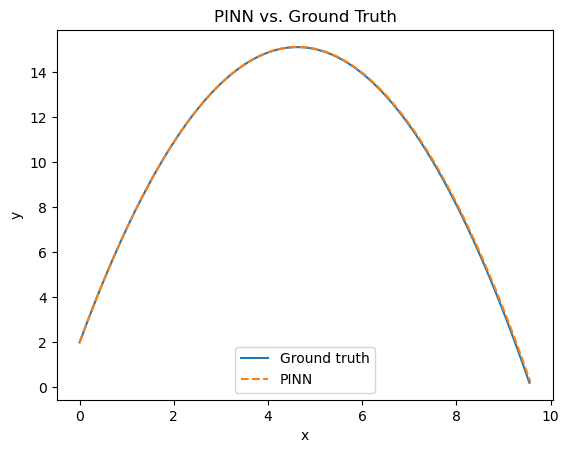

In [9]:
# plot & mse
plt.plot(labels_pde_x, labels_pde_y, label = "Ground truth"); plt.plot(x, y, '--', label = "PINN");
plt.legend(loc='lower center'); plt.title('PINN vs. Ground Truth'); plt.xlabel('x'); plt.ylabel('y');
jnp.mean((jnp.hstack([labels_pde_x, labels_pde_y]) - jnp.hstack([x, y]))**2)

Write PINN prediction & ground truth to file

In [10]:
#np.save('projectile_cma_60s', (x, y, labels_pde_x, labels_pde_y))